<a href="https://colab.research.google.com/github/NikhitaB15/Machine_Learning/blob/main/knn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE DEPENDENCIES

In [8]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [9]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [10]:
#shape  of numpy array
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [11]:
X_train=X_train/255
X_test=X_test/255

building the neural network

In [16]:
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(10,activation='sigmoid')
])

In [18]:
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [22]:
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0551 - accuracy: 0.9820
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0318 - accuracy: 0.9898
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0282 - accuracy: 0.9904
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0258 - accuracy: 0.9917
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0226 - accuracy: 0.9924
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0219 - accuracy: 0.9925
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0177 - accuracy: 0.9940
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0181 - accuracy: 0.9942
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0154 - accuracy: 0.9951
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.017

In [24]:
loss,accuracy=model.evaluate(X_test,Y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.0819 - accuracy: 0.9804


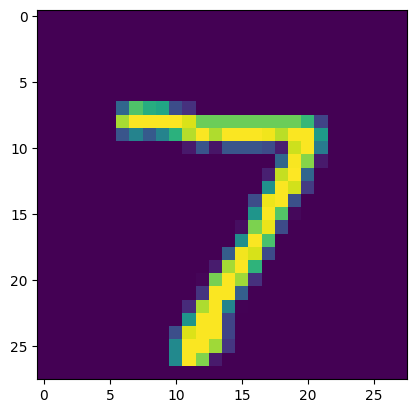

In [26]:
plt.imshow(X_test[0])
plt.show()

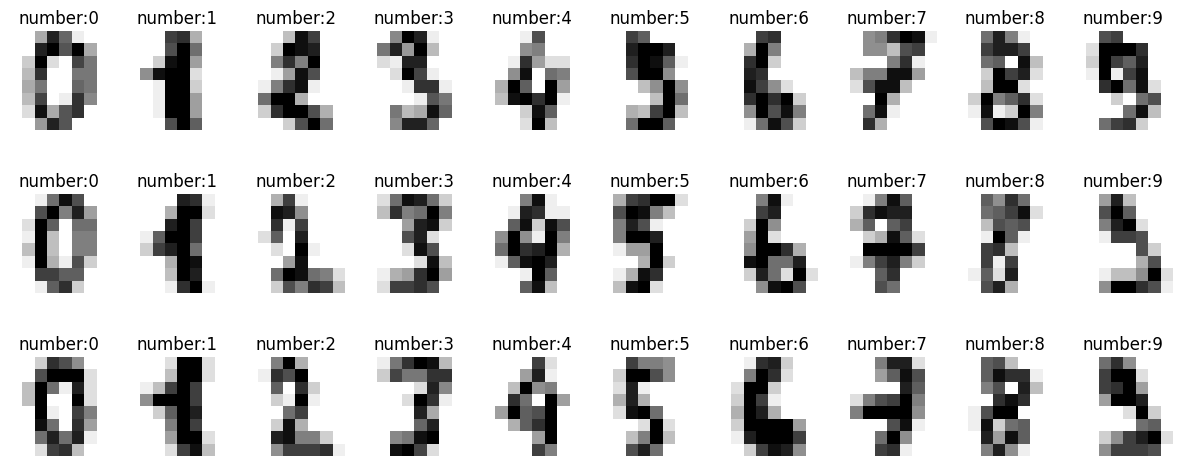

In [ ]:
figure, axes =plt.subplots(3,10, figsize=(15,6))
for ax,image,number in zip(axes.ravel(), digits.images, y):
  ax.axis('off')
  ax.imshow(image,cmap=plt.cm.gray_r)
  ax.set_title('number:' + str(number))

In [27]:
Y_pred=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [28]:
print(Y_pred[0])

[1.1584837e-07 8.5126824e-04 2.5153190e-03 9.9195683e-01 2.1814524e-08
 2.2393870e-01 6.4662781e-10 9.9999893e-01 6.3036889e-01 2.0506238e-03]


In [30]:
label_for_1st=np.argmax(Y_pred[0])
print(label_for_1st)

7


In [31]:
Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels) 

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 3, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 5, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 8, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [32]:
conf_mat=confusion_matrix(Y_test, Y_pred_labels)

In [33]:
print(conf_mat)

tf.Tensor(
[[ 951    0    2    0    2   10    9    4    1    1]
 [   0 1128    1    0    0    2    2    0    2    0]
 [   0    3 1014    2    1    1    2    5    4    0]
 [   1    0    4  993    1    3    0    3    2    3]
 [   0    2    3    0  958    3    7    2    1    6]
 [   1    0    0   50    0  840    1    0    0    0]
 [  10    1    0    1    2   13  929    0    2    0]
 [   0    3    9    4    1    0    0 1006    2    3]
 [   2    1    0    9    0   17    2    2  939    2]
 [   1    2    1    5    4   15    2    2    5  972]], shape=(10, 10), dtype=int32)


Text(158.22222222222223, 0.5, 'True labels')

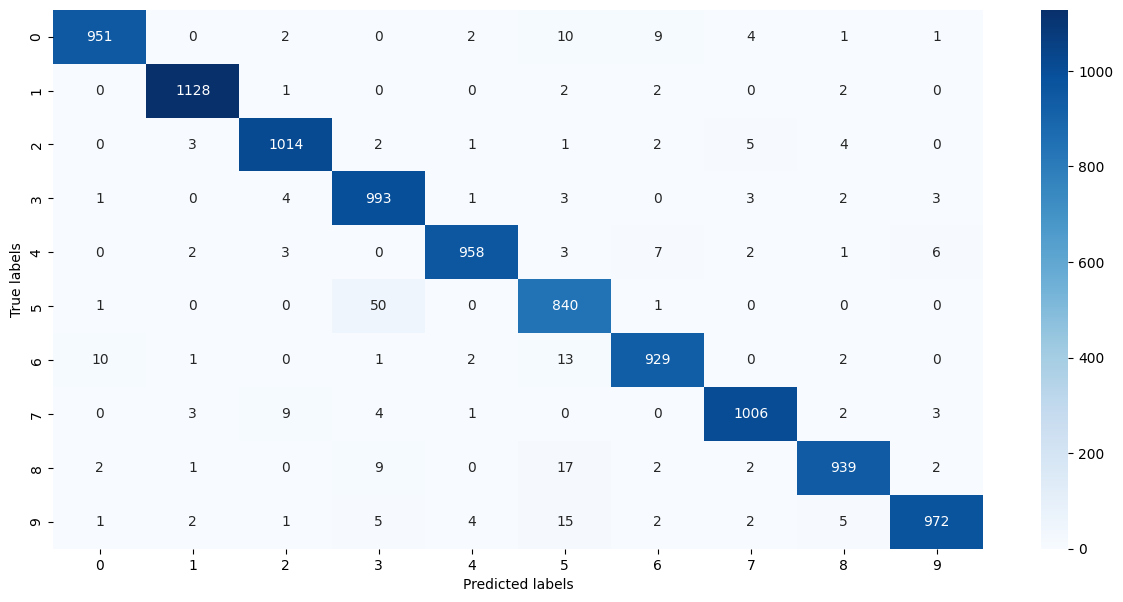

In [35]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

In [89]:
input_image_path='/content/images.png'
input_img=cv2.imread(input_image_path)
type(input_img)

numpy.ndarray

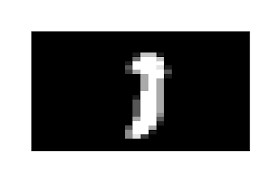

(190, 266, 3)

In [93]:
cv2_imshow(input_img)
input_img.shape

In [94]:
grayscale=cv2.cvtColor(input_img,cv2.COLOR_RGB2GRAY)

In [95]:
grayscale.shape

(190, 266)

In [96]:
input_img_resize=cv2.resize(grayscale,(28,28))

In [97]:

input_img_resize.shape

(28, 28)

In [98]:
cv2_imshow(input_img_resize)

In [99]:
input_img_resize=input_img_resize/255
image_reshaped=np.reshape(input_img_resize,[1,28,28])

In [100]:
input_pred=model.predict(image_reshaped)
print(input_pred)

1/1 [==============================] - 0s 42ms/step
[[1.5470320e-34 1.0000000e+00 1.0000000e+00 1.0000000e+00 0.0000000e+00
  1.0000000e+00 2.5269385e-32 1.0000000e+00 0.0000000e+00 1.6352545e-30]]


In [101]:
input_pred_label=np.argmax(input_pred)

In [102]:
print(input_pred_label)

1
